## 03 Feature Engineering (v2)

#### Import relevant libraries

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

#### Load processed dataset

In [2]:
input_dir = os.path.join('..', 'data', 'processed')
data_df = pd.read_csv(os.path.join(input_dir, 'processed_data.csv'))
data_df

,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,...,utype,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_purchased_power,generation_renewables_and_storage,generation_steam,energy_burden,normalized_expenditure
0,2.0,2005,375.031464,7.084629,9.540319,140.598363,24.935923,79.832394,93.020037,115.705892,...,vert_int,0.001164,4.436797,13.738337,5.483874,8.473223,0.0,49.987032,0.024592,81.676905
1,2.0,2006,403.967434,8.175744,20.977633,150.312633,25.845165,83.786720,112.218061,136.302804,...,vert_int,0.002765,2.812857,14.039622,6.153681,8.771999,0.0,50.243436,0.026468,89.320532
2,2.0,2007,362.674741,9.373432,25.958163,162.860281,26.922500,86.942468,136.816315,146.322099,...,vert_int,1.237031,1.403520,13.097867,6.950935,9.521604,0.0,51.081573,0.027564,97.147337
3,2.0,2008,389.722554,12.139279,17.184093,161.259248,25.216835,87.957893,136.354090,157.862545,...,vert_int,1.300172,2.477033,14.073225,7.199782,9.015558,0.0,49.206599,0.028647,108.684700
4,2.0,2009,368.234034,10.900991,22.232564,178.909959,25.595063,94.547352,144.596841,136.960261,...,vert_int,0.684756,5.903936,13.973577,8.799929,5.808104,0.0,41.204845,0.029137,108.551083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,428.0,2016,120.751263,294.214436,-116.874290,203.470335,0.000000,0.000000,179.737203,0.000000,...,other_wires,0.000000,0.000000,0.000000,0.000004,0.818070,0.0,0.254507,0.018758,111.441490
1900,428.0,2017,144.546326,323.702090,-168.226409,206.674057,0.000000,0.000000,207.970206,0.000000,...,other_wires,0.000000,0.000000,0.000000,0.000003,0.788461,0.0,0.349109,0.015613,106.074202
1901,428.0,2018,337.354284,419.012129,-44.482765,218.418440,0.000000,0.000000,105.759399,0.000000,...,other_wires,0.000000,0.000000,0.000000,0.000000,0.846027,0.0,0.000000,0.017386,113.902374
1902,428.0,2019,304.415689,348.490451,-10.125463,228.879953,0.000000,0.000000,68.613095,0.000000,...,other_wires,0.000000,0.000000,0.000000,0.000000,0.823920,0.0,0.000000,0.016126,109.822755


In [3]:
is_after_2010 = data_df['year'] >= 2010  #inclusive
data_after_2010_df = data_df[is_after_2010]
data_after_2010_df

,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,...,utype,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_purchased_power,generation_renewables_and_storage,generation_steam,energy_burden,normalized_expenditure
5,2.0,2010,375.715469,13.529815,57.306195,207.855781,29.301764,108.447788,146.998675,147.119361,...,vert_int,0.595833,3.707895,13.169684,10.337048,4.793492,0.0,44.022450,0.033783,111.838989
6,2.0,2011,310.984887,10.408721,65.922993,198.367910,28.815423,106.466901,123.115743,132.823094,...,vert_int,0.049948,3.038090,14.431250,10.666586,4.675221,0.0,39.396937,0.031261,114.943218
7,2.0,2012,251.854838,7.318077,63.958472,193.694724,28.306831,116.294001,135.947289,111.941675,...,vert_int,0.070519,2.660740,14.762977,10.724467,5.435726,0.0,33.224328,0.029887,117.445000
8,2.0,2013,305.709743,8.302617,47.394754,196.508342,27.988239,116.667248,137.888028,119.111570,...,vert_int,0.085471,5.624866,14.098022,10.739554,4.010261,0.0,35.701607,0.028994,115.989436
9,2.0,2014,321.439930,9.774353,23.646072,206.273280,30.414294,121.274889,148.945759,127.578481,...,vert_int,0.096536,3.892956,14.505389,10.738816,6.554533,0.0,35.361499,0.030413,117.954902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,428.0,2016,120.751263,294.214436,-116.874290,203.470335,0.000000,0.000000,179.737203,0.000000,...,other_wires,0.000000,0.000000,0.000000,0.000004,0.818070,0.0,0.254507,0.018758,111.441490
1900,428.0,2017,144.546326,323.702090,-168.226409,206.674057,0.000000,0.000000,207.970206,0.000000,...,other_wires,0.000000,0.000000,0.000000,0.000003,0.788461,0.0,0.349109,0.015613,106.074202
1901,428.0,2018,337.354284,419.012129,-44.482765,218.418440,0.000000,0.000000,105.759399,0.000000,...,other_wires,0.000000,0.000000,0.000000,0.000000,0.846027,0.0,0.000000,0.017386,113.902374
1902,428.0,2019,304.415689,348.490451,-10.125463,228.879953,0.000000,0.000000,68.613095,0.000000,...,other_wires,0.000000,0.000000,0.000000,0.000000,0.823920,0.0,0.000000,0.016126,109.822755


In [4]:
data_after_2010_df.columns

Index(['respondent_id', 'year', 'bill_gas', 'bill_other fuel',
       'bill_adjustment', 'bill_distribution', 'bill_hydro', 'bill_nuclear',
       'bill_other', 'bill_other_fossil', 'bill_purchased_power',
       'bill_renewables', 'bill_steam', 'bill_transmission', 'expenditure_gas',
       'expenditure_other fuel', 'expenditure_adjustment',
       'expenditure_distribution', 'expenditure_hydro', 'expenditure_nuclear',
       'expenditure_other', 'expenditure_other_fossil',
       'expenditure_purchased_power', 'expenditure_renewables',
       'expenditure_steam', 'expenditure_transmission', 'housing_units',
       'income', 'asset_value_distribution', 'asset_value_hydro',
       'asset_value_nuclear', 'asset_value_other', 'asset_value_other_fossil',
       'asset_value_renewables', 'asset_value_steam',
       'asset_value_transmission', 'earnings_value_distribution',
       'earnings_value_hydro', 'earnings_value_nuclear',
       'earnings_value_other', 'earnings_value_other_fossil',

In [5]:
data_after_2010_df['row_id'] = data_after_2010_df['respondent_id']*10000 + data_after_2010_df['year']
data_after_2010_df

/tmp/ipykernel_26462/404021376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_after_2010_df['row_id'] = data_after_2010_df['respondent_id']*10000 + data_after_2010_df['year']


,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,...,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_purchased_power,generation_renewables_and_storage,generation_steam,energy_burden,normalized_expenditure,row_id
5,2.0,2010,375.715469,13.529815,57.306195,207.855781,29.301764,108.447788,146.998675,147.119361,...,0.595833,3.707895,13.169684,10.337048,4.793492,0.0,44.022450,0.033783,111.838989,22010.0
6,2.0,2011,310.984887,10.408721,65.922993,198.367910,28.815423,106.466901,123.115743,132.823094,...,0.049948,3.038090,14.431250,10.666586,4.675221,0.0,39.396937,0.031261,114.943218,22011.0
7,2.0,2012,251.854838,7.318077,63.958472,193.694724,28.306831,116.294001,135.947289,111.941675,...,0.070519,2.660740,14.762977,10.724467,5.435726,0.0,33.224328,0.029887,117.445000,22012.0
8,2.0,2013,305.709743,8.302617,47.394754,196.508342,27.988239,116.667248,137.888028,119.111570,...,0.085471,5.624866,14.098022,10.739554,4.010261,0.0,35.701607,0.028994,115.989436,22013.0
9,2.0,2014,321.439930,9.774353,23.646072,206.273280,30.414294,121.274889,148.945759,127.578481,...,0.096536,3.892956,14.505389,10.738816,6.554533,0.0,35.361499,0.030413,117.954902,22014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,428.0,2016,120.751263,294.214436,-116.874290,203.470335,0.000000,0.000000,179.737203,0.000000,...,0.000000,0.000000,0.000000,0.000004,0.818070,0.0,0.254507,0.018758,111.441490,4282016.0
1900,428.0,2017,144.546326,323.702090,-168.226409,206.674057,0.000000,0.000000,207.970206,0.000000,...,0.000000,0.000000,0.000000,0.000003,0.788461,0.0,0.349109,0.015613,106.074202,4282017.0
1901,428.0,2018,337.354284,419.012129,-44.482765,218.418440,0.000000,0.000000,105.759399,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.846027,0.0,0.000000,0.017386,113.902374,4282018.0
1902,428.0,2019,304.415689,348.490451,-10.125463,228.879953,0.000000,0.000000,68.613095,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.823920,0.0,0.000000,0.016126,109.822755,4282019.0


#### Create target variable

9-year timeframe: 2010 to 2018 (because calculating average change in residential price in a 3-year timeframe), and this is building in delayed impact.

Average change in expenditure for 2012, looking forward 2 years: (((exp_2013 - exp_2012)/(exp_2012)) + ((exp_2014 - exp_2013)/(exp_2013)))/2

In [6]:
# Target variable
# normalized_expenditure = data_after_2010_df.reset_index()[['respondent_id', 'year', 'normalized_expenditure']]
normalized_expenditure = data_after_2010_df.reset_index()[['row_id', 'year', 'normalized_expenditure']]
normalized_expenditure

,row_id,year,normalized_expenditure
0,22010.0,2010,111.838989
1,22011.0,2011,114.943218
2,22012.0,2012,117.445000
3,22013.0,2013,115.989436
4,22014.0,2014,117.954902
...,...,...,...
1304,4282016.0,2016,111.441490
1305,4282017.0,2017,106.074202
1306,4282018.0,2018,113.902374
1307,4282019.0,2019,109.822755


In [7]:
# Lag (if looking behind)
# normalized_expenditure['prev_yr_exp'] = normalized_expenditure['normalized_expenditure'].shift(1, fill_value=0)
# normalized_expenditure['prev_2yrs_exp'] = normalized_expenditure['normalized_expenditure'].shift(2, fill_value=0)

# Lead (if looking forward)
normalized_expenditure['next_yr_exp'] = normalized_expenditure['normalized_expenditure'].shift(-1, fill_value=0)
normalized_expenditure['next_2yrs_exp'] = normalized_expenditure['normalized_expenditure'].shift(-2, fill_value=0)
normalized_expenditure.head(20)

,row_id,year,normalized_expenditure,next_yr_exp,next_2yrs_exp
0,22010.0,2010,111.838989,114.943218,117.445000
1,22011.0,2011,114.943218,117.445000,115.989436
2,22012.0,2012,117.445000,115.989436,117.954902
3,22013.0,2013,115.989436,117.954902,122.034790
4,22014.0,2014,117.954902,122.034790,126.580203
5,22015.0,2015,122.034790,126.580203,133.721222
6,22016.0,2016,126.580203,133.721222,125.370902
7,22017.0,2017,133.721222,125.370902,134.069903
8,22018.0,2018,125.370902,134.069903,135.056713
9,22019.0,2019,134.069903,135.056713,106.946635


In [8]:
pre_2018 = (normalized_expenditure['year'] <= 2018)
normalized_expenditure = normalized_expenditure[pre_2018]
normalized_expenditure.head(20)

,row_id,year,normalized_expenditure,next_yr_exp,next_2yrs_exp
0,22010.0,2010,111.838989,114.943218,117.445000
1,22011.0,2011,114.943218,117.445000,115.989436
2,22012.0,2012,117.445000,115.989436,117.954902
3,22013.0,2013,115.989436,117.954902,122.034790
4,22014.0,2014,117.954902,122.034790,126.580203
5,22015.0,2015,122.034790,126.580203,133.721222
6,22016.0,2016,126.580203,133.721222,125.370902
7,22017.0,2017,133.721222,125.370902,134.069903
8,22018.0,2018,125.370902,134.069903,135.056713
11,32010.0,2010,106.946635,120.987794,119.292404


In [9]:
## Target variable: 
normalized_expenditure['av_price_change'] = \
    ((normalized_expenditure['next_yr_exp'] - normalized_expenditure['normalized_expenditure'])/(normalized_expenditure['normalized_expenditure']) + \
    (normalized_expenditure['next_2yrs_exp'] - normalized_expenditure['next_yr_exp'])/(normalized_expenditure['next_yr_exp']))\
    /2
normalized_expenditure

/tmp/ipykernel_26462/2691531328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_expenditure['av_price_change'] = \


,row_id,year,normalized_expenditure,next_yr_exp,next_2yrs_exp,av_price_change
0,22010.0,2010,111.838989,114.943218,117.445000,0.024761
1,22011.0,2011,114.943218,117.445000,115.989436,0.004686
2,22012.0,2012,117.445000,115.989436,117.954902,0.002276
3,22013.0,2013,115.989436,117.954902,122.034790,0.025767
4,22014.0,2014,117.954902,122.034790,126.580203,0.035918
...,...,...,...,...,...,...
1302,4282014.0,2014,128.591665,117.336134,111.441490,-0.068883
1303,4282015.0,2015,117.336134,111.441490,106.074202,-0.049200
1304,4282016.0,2016,111.441490,106.074202,113.902374,0.012818
1305,4282017.0,2017,106.074202,113.902374,109.822755,0.018991


In [10]:
target = normalized_expenditure['av_price_change'].reset_index(drop=True)
target

0       0.024761
1       0.004686
2       0.002276
3       0.025767
4       0.035918
          ...   
1066   -0.068883
1067   -0.049200
1068    0.012818
1069    0.018991
1070   -0.021715
Name: av_price_change, Length: 1071, dtype: float64

**Data from 2010 to 2018**

In [11]:
data_pre_2018_df = data_after_2010_df[data_after_2010_df['year'] <= 2018]
data_pre_2018_df

,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,...,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_purchased_power,generation_renewables_and_storage,generation_steam,energy_burden,normalized_expenditure,row_id
5,2.0,2010,375.715469,13.529815,57.306195,207.855781,29.301764,108.447788,146.998675,147.119361,...,0.595833,3.707895,13.169684,10.337048,4.793492,0.0,44.022450,0.033783,111.838989,22010.0
6,2.0,2011,310.984887,10.408721,65.922993,198.367910,28.815423,106.466901,123.115743,132.823094,...,0.049948,3.038090,14.431250,10.666586,4.675221,0.0,39.396937,0.031261,114.943218,22011.0
7,2.0,2012,251.854838,7.318077,63.958472,193.694724,28.306831,116.294001,135.947289,111.941675,...,0.070519,2.660740,14.762977,10.724467,5.435726,0.0,33.224328,0.029887,117.445000,22012.0
8,2.0,2013,305.709743,8.302617,47.394754,196.508342,27.988239,116.667248,137.888028,119.111570,...,0.085471,5.624866,14.098022,10.739554,4.010261,0.0,35.701607,0.028994,115.989436,22013.0
9,2.0,2014,321.439930,9.774353,23.646072,206.273280,30.414294,121.274889,148.945759,127.578481,...,0.096536,3.892956,14.505389,10.738816,6.554533,0.0,35.361499,0.030413,117.954902,22014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,428.0,2014,158.113482,555.291597,-126.117586,203.376168,0.000000,0.000000,197.721946,0.000000,...,0.000000,0.000000,0.000000,0.000016,0.836826,0.0,0.356748,0.022694,128.591665,4282014.0
1898,428.0,2015,143.199850,384.308423,-112.101241,201.287076,0.000000,0.000000,194.074933,0.000000,...,0.000000,0.000000,0.000000,0.000003,0.822487,0.0,0.339950,0.019192,117.336134,4282015.0
1899,428.0,2016,120.751263,294.214436,-116.874290,203.470335,0.000000,0.000000,179.737203,0.000000,...,0.000000,0.000000,0.000000,0.000004,0.818070,0.0,0.254507,0.018758,111.441490,4282016.0
1900,428.0,2017,144.546326,323.702090,-168.226409,206.674057,0.000000,0.000000,207.970206,0.000000,...,0.000000,0.000000,0.000000,0.000003,0.788461,0.0,0.349109,0.015613,106.074202,4282017.0


#### Prepare DataFrames for Investments

In [12]:
investment_column_names = ['row_id', 'respondent_id', 'year', 'investment_value_distribution',
       'investment_value_hydro', 'investment_value_nuclear',
       'investment_value_other', 'investment_value_other_fossil',
       'investment_value_renewables', 'investment_value_steam',
       'investment_value_transmission', 'sales']

In [13]:
investment_column_names_only = ['investment_value_distribution',
 'investment_value_hydro',
 'investment_value_nuclear',
 'investment_value_other',
 'investment_value_other_fossil',
 'investment_value_renewables',
 'investment_value_steam',
 'investment_value_transmission']
investment_column_names_only

['investment_value_distribution',
 'investment_value_hydro',
 'investment_value_nuclear',
 'investment_value_other',
 'investment_value_other_fossil',
 'investment_value_renewables',
 'investment_value_steam',
 'investment_value_transmission']

In [14]:
investments_sales_df = data_pre_2018_df[investment_column_names]
investments_sales_df

,row_id,respondent_id,year,investment_value_distribution,investment_value_hydro,investment_value_nuclear,investment_value_other,investment_value_other_fossil,investment_value_renewables,investment_value_steam,investment_value_transmission,sales
5,22010.0,2.0,2010,296011623.0,6234229.0,77733140.0,94034652.0,0.0,0.0,946788067.0,136373665.0,20417032.0
6,22011.0,2.0,2011,351345076.0,22852001.0,144838131.0,68096283.0,0.0,0.0,257254121.0,216313521.0,18650366.0
7,22012.0,2.0,2012,258338498.0,14765465.0,58458982.0,157382446.0,0.0,0.0,54826093.0,153362827.0,17612420.0
8,22013.0,2.0,2013,287329351.0,26477815.0,50928276.0,256594847.0,0.0,0.0,72715405.0,176758705.0,17919762.0
9,22014.0,2.0,2014,328096305.0,39142268.0,31874019.0,148174915.0,0.0,0.0,318747804.0,315617541.0,18726485.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1897,4282014.0,428.0,2014,5183490.0,0.0,0.0,515233.0,0.0,0.0,0.0,1885708.0,543147.0
1898,4282015.0,428.0,2015,5479993.0,0.0,0.0,230021.0,0.0,0.0,0.0,1684245.0,554166.0
1899,4282016.0,428.0,2016,4907945.0,0.0,0.0,278250.0,0.0,0.0,0.0,3297710.0,551190.0
1900,4282017.0,428.0,2017,9968608.0,0.0,0.0,234993.0,0.0,0.0,0.0,3240558.0,525781.0


In [15]:
investments_sales_df['sum_investments'] = investments_sales_df[investment_column_names_only].sum(axis=1)
investments_sales_df['sum_investments_generation'] = investments_sales_df['sum_investments'] - investments_sales_df['investment_value_transmission'] - investments_sales_df['investment_value_distribution']
investments_sales_df

/tmp/ipykernel_26462/3465051763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  investments_sales_df['sum_investments'] = investments_sales_df[investment_column_names_only].sum(axis=1)
/tmp/ipykernel_26462/3465051763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  investments_sales_df['sum_investments_generation'] = investments_sales_df['sum_investments'] - investments_sales_df['investment_value_transmission'] - investments_sales_df['investment_value_distribution']


,row_id,respondent_id,year,investment_value_distribution,investment_value_hydro,investment_value_nuclear,investment_value_other,investment_value_other_fossil,investment_value_renewables,investment_value_steam,investment_value_transmission,sales,sum_investments,sum_investments_generation
5,22010.0,2.0,2010,296011623.0,6234229.0,77733140.0,94034652.0,0.0,0.0,946788067.0,136373665.0,20417032.0,1.557175e+09,1.124790e+09
6,22011.0,2.0,2011,351345076.0,22852001.0,144838131.0,68096283.0,0.0,0.0,257254121.0,216313521.0,18650366.0,1.060699e+09,4.930405e+08
7,22012.0,2.0,2012,258338498.0,14765465.0,58458982.0,157382446.0,0.0,0.0,54826093.0,153362827.0,17612420.0,6.971343e+08,2.854330e+08
8,22013.0,2.0,2013,287329351.0,26477815.0,50928276.0,256594847.0,0.0,0.0,72715405.0,176758705.0,17919762.0,8.708044e+08,4.067163e+08
9,22014.0,2.0,2014,328096305.0,39142268.0,31874019.0,148174915.0,0.0,0.0,318747804.0,315617541.0,18726485.0,1.181653e+09,5.379390e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,4282014.0,428.0,2014,5183490.0,0.0,0.0,515233.0,0.0,0.0,0.0,1885708.0,543147.0,7.584431e+06,5.152330e+05
1898,4282015.0,428.0,2015,5479993.0,0.0,0.0,230021.0,0.0,0.0,0.0,1684245.0,554166.0,7.394259e+06,2.300210e+05
1899,4282016.0,428.0,2016,4907945.0,0.0,0.0,278250.0,0.0,0.0,0.0,3297710.0,551190.0,8.483905e+06,2.782500e+05
1900,4282017.0,428.0,2017,9968608.0,0.0,0.0,234993.0,0.0,0.0,0.0,3240558.0,525781.0,1.344416e+07,2.349930e+05


In [16]:
# Checking for total sum of investments being negative:
# investments_sales_df[investments_sales_df['sum_investments'] < 0]

# Checking for total sum of investments being less than investments in (transmission+distribution)
investments_sales_df[investments_sales_df['sum_investments'] < (investments_sales_df['investment_value_distribution']+investments_sales_df['investment_value_transmission'])]


,row_id,respondent_id,year,investment_value_distribution,investment_value_hydro,investment_value_nuclear,investment_value_other,investment_value_other_fossil,investment_value_renewables,investment_value_steam,investment_value_transmission,sales,sum_investments,sum_investments_generation
197,272010.0,27.0,2010,93289187.0,0.0,0.0,56008009.0,0.0,0.0,-267748117.0,5850693.0,7640842.0,-112600228.0,-211740108.0
316,422017.0,42.0,2017,69271131.0,0.0,0.0,2049328.0,-4729241.0,0.0,-32538157.0,-1002552.0,2610624.0,33050509.0,-35218070.0
317,422018.0,42.0,2018,62449089.0,0.0,0.0,-14150829.0,0.0,0.0,1.0,-514091.0,2835024.0,47784170.0,-14150828.0
445,552018.0,55.0,2018,414675614.0,0.0,0.0,-54442257.0,0.0,0.0,36271001.0,290747654.0,20635602.0,687252012.0,-18171256.0
796,992017.0,99.0,2017,40128799.0,0.0,0.0,17630545.0,0.0,0.0,-21065490.0,28622211.0,1943853.0,65316065.0,-3434945.0
854,1072011.0,107.0,2011,40245646.0,0.0,0.0,-426305.0,0.0,0.0,0.0,32109852.0,3064447.0,71929193.0,-426305.0
905,1152014.0,115.0,2014,78076338.0,1694828.0,0.0,-7052659.0,0.0,0.0,131363.0,35014832.0,6678237.0,107864702.0,-5226468.0
919,1172012.0,117.0,2012,225912908.0,0.0,0.0,-175576.0,0.0,0.0,0.0,141129506.0,9036230.0,366866838.0,-175576.0
956,1202017.0,120.0,2017,172860870.0,42934.0,117289291.0,-425343648.0,8244142.0,5627263.0,38138096.0,146364297.0,9899976.0,63223245.0,-256001922.0
1416,1512013.0,151.0,2013,53433748.0,-2702114.0,0.0,197561.0,0.0,0.0,-8170.0,88217890.0,2686169.0,139138915.0,-2512723.0


#### Prepare DataFrames for Expenditures

In [17]:
expenditure_column_names = ['row_id', 'respondent_id', 'year', 'expenditure_gas',
       'expenditure_other fuel', 'expenditure_adjustment',
       'expenditure_distribution', 'expenditure_hydro', 'expenditure_nuclear',
       'expenditure_other', 'expenditure_other_fossil',
       'expenditure_purchased_power', 'expenditure_renewables',
       'expenditure_steam', 'expenditure_transmission']

In [18]:
expenditures_df = data_pre_2018_df[expenditure_column_names]
expenditures_df

,row_id,respondent_id,year,expenditure_gas,expenditure_other fuel,expenditure_adjustment,expenditure_distribution,expenditure_hydro,expenditure_nuclear,expenditure_other,expenditure_other_fossil,expenditure_purchased_power,expenditure_renewables,expenditure_steam,expenditure_transmission
5,22010.0,2.0,2010,6.080564e+08,2.002633e+07,8.956252e+07,3.248530e+08,4.579505e+07,1.694905e+08,2.297408e+08,2.299294e+08,1.265088e+08,0.0,9.120914e+08,1.554485e+08
6,22011.0,2.0,2011,5.032305e+08,1.540458e+07,1.030160e+08,3.099838e+08,4.502904e+07,1.663728e+08,1.923894e+08,2.075588e+08,1.112800e+08,0.0,8.575845e+08,1.505196e+08
7,22012.0,2.0,2012,4.094341e+08,1.088067e+07,1.004088e+08,3.040825e+08,4.443907e+07,1.825707e+08,2.134245e+08,1.757379e+08,1.026648e+08,0.0,7.943939e+08,1.507688e+08
8,22013.0,2.0,2013,4.986984e+08,1.238707e+07,7.466188e+07,3.095634e+08,4.409042e+07,1.837882e+08,2.172177e+08,1.876388e+08,8.917199e+07,0.0,8.191430e+08,1.532276e+08
9,22014.0,2.0,2014,5.264963e+08,1.464226e+07,3.740197e+07,3.262710e+08,4.810755e+07,1.918255e+08,2.355937e+08,2.017962e+08,1.505080e+08,0.0,8.451021e+08,1.722740e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,4282014.0,428.0,2014,1.094781e+07,4.082092e+07,-8.957539e+06,1.444485e+07,0.000000e+00,0.000000e+00,1.404326e+07,0.000000e+00,4.249500e+07,0.0,0.000000e+00,7.818629e+06
1898,4282015.0,428.0,2015,9.897865e+06,2.820214e+07,-7.948111e+06,1.427149e+07,0.000000e+00,0.000000e+00,1.376014e+07,0.000000e+00,3.707793e+07,0.0,0.000000e+00,7.862245e+06
1899,4282016.0,428.0,2016,8.508476e+06,2.201037e+07,-8.447606e+06,1.470672e+07,0.000000e+00,0.000000e+00,1.299130e+07,0.000000e+00,3.410134e+07,0.0,0.000000e+00,8.073650e+06
1900,4282017.0,428.0,2017,1.020631e+07,2.426669e+07,-1.218458e+07,1.496933e+07,0.000000e+00,0.000000e+00,1.506321e+07,0.000000e+00,2.981970e+07,0.0,0.000000e+00,8.104139e+06


In [19]:
expenditure_column_names_only = ['expenditure_gas',
       'expenditure_other fuel', 'expenditure_adjustment',
       'expenditure_distribution', 'expenditure_hydro', 'expenditure_nuclear',
       'expenditure_other', 'expenditure_other_fossil',
       'expenditure_purchased_power', 'expenditure_renewables',
       'expenditure_steam', 'expenditure_transmission']
expenditure_column_names_only

['expenditure_gas',
 'expenditure_other fuel',
 'expenditure_adjustment',
 'expenditure_distribution',
 'expenditure_hydro',
 'expenditure_nuclear',
 'expenditure_other',
 'expenditure_other_fossil',
 'expenditure_purchased_power',
 'expenditure_renewables',
 'expenditure_steam',
 'expenditure_transmission']

In [20]:
expenditures_df['sum_expenditures'] = expenditures_df[expenditure_column_names_only].sum(axis=1)
expenditures_df['sum_expenditures_generation'] = expenditures_df['sum_expenditures'] - expenditures_df['expenditure_transmission'] - expenditures_df['expenditure_distribution']
expenditures_df

/tmp/ipykernel_26462/3813100926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expenditures_df['sum_expenditures'] = expenditures_df[expenditure_column_names_only].sum(axis=1)
/tmp/ipykernel_26462/3813100926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expenditures_df['sum_expenditures_generation'] = expenditures_df['sum_expenditures'] - expenditures_df['expenditure_transmission'] - expenditures_df['expenditure_distribution']


,row_id,respondent_id,year,expenditure_gas,expenditure_other fuel,expenditure_adjustment,expenditure_distribution,expenditure_hydro,expenditure_nuclear,expenditure_other,expenditure_other_fossil,expenditure_purchased_power,expenditure_renewables,expenditure_steam,expenditure_transmission,sum_expenditures,sum_expenditures_generation
5,22010.0,2.0,2010,6.080564e+08,2.002633e+07,8.956252e+07,3.248530e+08,4.579505e+07,1.694905e+08,2.297408e+08,2.299294e+08,1.265088e+08,0.0,9.120914e+08,1.554485e+08,2.911503e+09,2.431201e+09
6,22011.0,2.0,2011,5.032305e+08,1.540458e+07,1.030160e+08,3.099838e+08,4.502904e+07,1.663728e+08,1.923894e+08,2.075588e+08,1.112800e+08,0.0,8.575845e+08,1.505196e+08,2.662369e+09,2.201866e+09
7,22012.0,2.0,2012,4.094341e+08,1.088067e+07,1.004088e+08,3.040825e+08,4.443907e+07,1.825707e+08,2.134245e+08,1.757379e+08,1.026648e+08,0.0,7.943939e+08,1.507688e+08,2.488806e+09,2.033954e+09
8,22013.0,2.0,2013,4.986984e+08,1.238707e+07,7.466188e+07,3.095634e+08,4.409042e+07,1.837882e+08,2.172177e+08,1.876388e+08,8.917199e+07,0.0,8.191430e+08,1.532276e+08,2.589588e+09,2.126797e+09
9,22014.0,2.0,2014,5.264963e+08,1.464226e+07,3.740197e+07,3.262710e+08,4.810755e+07,1.918255e+08,2.355937e+08,2.017962e+08,1.505080e+08,0.0,8.451021e+08,1.722740e+08,2.750019e+09,2.251474e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,4282014.0,428.0,2014,1.094781e+07,4.082092e+07,-8.957539e+06,1.444485e+07,0.000000e+00,0.000000e+00,1.404326e+07,0.000000e+00,4.249500e+07,0.0,0.000000e+00,7.818629e+06,1.216129e+08,9.934945e+07
1898,4282015.0,428.0,2015,9.897865e+06,2.820214e+07,-7.948111e+06,1.427149e+07,0.000000e+00,0.000000e+00,1.376014e+07,0.000000e+00,3.707793e+07,0.0,0.000000e+00,7.862245e+06,1.031237e+08,8.098997e+07
1899,4282016.0,428.0,2016,8.508476e+06,2.201037e+07,-8.447606e+06,1.470672e+07,0.000000e+00,0.000000e+00,1.299130e+07,0.000000e+00,3.410134e+07,0.0,0.000000e+00,8.073650e+06,9.194424e+07,6.916387e+07
1900,4282017.0,428.0,2017,1.020631e+07,2.426669e+07,-1.218458e+07,1.496933e+07,0.000000e+00,0.000000e+00,1.506321e+07,0.000000e+00,2.981970e+07,0.0,0.000000e+00,8.104139e+06,9.024480e+07,6.717133e+07


#### Prepare DataFrames for Generation Mix

In [21]:
gen_column_names = ['row_id',
                    'respondent_id',
                    'year',
                    'generation_ee_dr', 
                    'generation_hydro', 
                    'generation_nuclear', 
                    'generation_other_fossil', 
                    'generation_steam', 
                    'generation_purchased_power', 
                    'generation_renewables_and_storage']

In [22]:
gen_mwh_df = data_pre_2018_df[gen_column_names]
gen_mwh_df

,row_id,respondent_id,year,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_steam,generation_purchased_power,generation_renewables_and_storage
5,22010.0,2.0,2010,0.595833,3.707895,13.169684,10.337048,44.022450,4.793492,0.0
6,22011.0,2.0,2011,0.049948,3.038090,14.431250,10.666586,39.396937,4.675221,0.0
7,22012.0,2.0,2012,0.070519,2.660740,14.762977,10.724467,33.224328,5.435726,0.0
8,22013.0,2.0,2013,0.085471,5.624866,14.098022,10.739554,35.701607,4.010261,0.0
9,22014.0,2.0,2014,0.096536,3.892956,14.505389,10.738816,35.361499,6.554533,0.0
...,...,...,...,...,...,...,...,...,...,...
1897,4282014.0,428.0,2014,0.000000,0.000000,0.000000,0.000016,0.356748,0.836826,0.0
1898,4282015.0,428.0,2015,0.000000,0.000000,0.000000,0.000003,0.339950,0.822487,0.0
1899,4282016.0,428.0,2016,0.000000,0.000000,0.000000,0.000004,0.254507,0.818070,0.0
1900,4282017.0,428.0,2017,0.000000,0.000000,0.000000,0.000003,0.349109,0.788461,0.0


In [23]:
gen_column_names_only = ['generation_ee_dr', 
                    'generation_hydro', 
                    'generation_nuclear', 
                    'generation_other_fossil', 
                    'generation_steam', 
                    'generation_purchased_power', 
                    'generation_renewables_and_storage']
gen_column_names_only

['generation_ee_dr',
 'generation_hydro',
 'generation_nuclear',
 'generation_other_fossil',
 'generation_steam',
 'generation_purchased_power',
 'generation_renewables_and_storage']

In [24]:
gen_mwh_df['sum_total_generation'] = gen_mwh_df[gen_column_names_only].sum(axis=1)
gen_mwh_df

/tmp/ipykernel_26462/1957166171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_mwh_df['sum_total_generation'] = gen_mwh_df[gen_column_names_only].sum(axis=1)


,row_id,respondent_id,year,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_steam,generation_purchased_power,generation_renewables_and_storage,sum_total_generation
5,22010.0,2.0,2010,0.595833,3.707895,13.169684,10.337048,44.022450,4.793492,0.0,76.626402
6,22011.0,2.0,2011,0.049948,3.038090,14.431250,10.666586,39.396937,4.675221,0.0,72.258032
7,22012.0,2.0,2012,0.070519,2.660740,14.762977,10.724467,33.224328,5.435726,0.0,66.878757
8,22013.0,2.0,2013,0.085471,5.624866,14.098022,10.739554,35.701607,4.010261,0.0,70.259781
9,22014.0,2.0,2014,0.096536,3.892956,14.505389,10.738816,35.361499,6.554533,0.0,71.149729
...,...,...,...,...,...,...,...,...,...,...,...
1897,4282014.0,428.0,2014,0.000000,0.000000,0.000000,0.000016,0.356748,0.836826,0.0,1.193590
1898,4282015.0,428.0,2015,0.000000,0.000000,0.000000,0.000003,0.339950,0.822487,0.0,1.162440
1899,4282016.0,428.0,2016,0.000000,0.000000,0.000000,0.000004,0.254507,0.818070,0.0,1.072581
1900,4282017.0,428.0,2017,0.000000,0.000000,0.000000,0.000003,0.349109,0.788461,0.0,1.137573


In [25]:
gen_column_names_wo_purchased = ['generation_ee_dr',
 'generation_hydro',
 'generation_nuclear',
 'generation_other_fossil',
 'generation_steam',
 'generation_renewables_and_storage']
gen_column_names_wo_purchased

['generation_ee_dr',
 'generation_hydro',
 'generation_nuclear',
 'generation_other_fossil',
 'generation_steam',
 'generation_renewables_and_storage']

In [26]:
gen_mwh_df['sum_generation_wo_purchased'] = gen_mwh_df[gen_column_names_wo_purchased].sum(axis=1)
gen_mwh_df

/tmp/ipykernel_26462/1743415429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_mwh_df['sum_generation_wo_purchased'] = gen_mwh_df[gen_column_names_wo_purchased].sum(axis=1)


,row_id,respondent_id,year,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_steam,generation_purchased_power,generation_renewables_and_storage,sum_total_generation,sum_generation_wo_purchased
5,22010.0,2.0,2010,0.595833,3.707895,13.169684,10.337048,44.022450,4.793492,0.0,76.626402,71.832910
6,22011.0,2.0,2011,0.049948,3.038090,14.431250,10.666586,39.396937,4.675221,0.0,72.258032,67.582811
7,22012.0,2.0,2012,0.070519,2.660740,14.762977,10.724467,33.224328,5.435726,0.0,66.878757,61.443031
8,22013.0,2.0,2013,0.085471,5.624866,14.098022,10.739554,35.701607,4.010261,0.0,70.259781,66.249520
9,22014.0,2.0,2014,0.096536,3.892956,14.505389,10.738816,35.361499,6.554533,0.0,71.149729,64.595196
...,...,...,...,...,...,...,...,...,...,...,...,...
1897,4282014.0,428.0,2014,0.000000,0.000000,0.000000,0.000016,0.356748,0.836826,0.0,1.193590,0.356764
1898,4282015.0,428.0,2015,0.000000,0.000000,0.000000,0.000003,0.339950,0.822487,0.0,1.162440,0.339953
1899,4282016.0,428.0,2016,0.000000,0.000000,0.000000,0.000004,0.254507,0.818070,0.0,1.072581,0.254511
1900,4282017.0,428.0,2017,0.000000,0.000000,0.000000,0.000003,0.349109,0.788461,0.0,1.137573,0.349112


In [27]:
gen_mwh_df['sum_fossil_generation'] = gen_mwh_df['generation_steam'] + gen_mwh_df['generation_other_fossil']
gen_mwh_df['sum_clean_generation'] = gen_mwh_df['generation_hydro'] \
                                    + gen_mwh_df['generation_nuclear'] \
                                    + gen_mwh_df['generation_renewables_and_storage']
gen_mwh_df

/tmp/ipykernel_26462/1891451360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_mwh_df['sum_fossil_generation'] = gen_mwh_df['generation_steam'] + gen_mwh_df['generation_other_fossil']
/tmp/ipykernel_26462/1891451360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_mwh_df['sum_clean_generation'] = gen_mwh_df['generation_hydro'] \


,row_id,respondent_id,year,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_steam,generation_purchased_power,generation_renewables_and_storage,sum_total_generation,sum_generation_wo_purchased,sum_fossil_generation,sum_clean_generation
5,22010.0,2.0,2010,0.595833,3.707895,13.169684,10.337048,44.022450,4.793492,0.0,76.626402,71.832910,54.359498,16.877579
6,22011.0,2.0,2011,0.049948,3.038090,14.431250,10.666586,39.396937,4.675221,0.0,72.258032,67.582811,50.063523,17.469340
7,22012.0,2.0,2012,0.070519,2.660740,14.762977,10.724467,33.224328,5.435726,0.0,66.878757,61.443031,43.948795,17.423717
8,22013.0,2.0,2013,0.085471,5.624866,14.098022,10.739554,35.701607,4.010261,0.0,70.259781,66.249520,46.441161,19.722888
9,22014.0,2.0,2014,0.096536,3.892956,14.505389,10.738816,35.361499,6.554533,0.0,71.149729,64.595196,46.100315,18.398345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,4282014.0,428.0,2014,0.000000,0.000000,0.000000,0.000016,0.356748,0.836826,0.0,1.193590,0.356764,0.356764,0.000000
1898,4282015.0,428.0,2015,0.000000,0.000000,0.000000,0.000003,0.339950,0.822487,0.0,1.162440,0.339953,0.339953,0.000000
1899,4282016.0,428.0,2016,0.000000,0.000000,0.000000,0.000004,0.254507,0.818070,0.0,1.072581,0.254511,0.254511,0.000000
1900,4282017.0,428.0,2017,0.000000,0.000000,0.000000,0.000003,0.349109,0.788461,0.0,1.137573,0.349112,0.349112,0.000000


In [28]:
gen_mwh_df[gen_mwh_df['generation_renewables_and_storage'] < 0]

,row_id,respondent_id,year,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_steam,generation_purchased_power,generation_renewables_and_storage,sum_total_generation,sum_generation_wo_purchased,sum_fossil_generation,sum_clean_generation
45,62018.0,6.0,2018,0.354175,0.756353,0.0,4.385579,19.258285,12.407175,-0.000210,37.161357,24.754182,23.643864,0.756143
203,272016.0,27.0,2016,0.790893,0.000000,0.0,0.000119,5.498224,6.172428,-0.053992,12.407672,6.235244,5.498343,-0.053992
204,272017.0,27.0,2017,0.947813,0.000000,0.0,0.000000,0.000000,5.475918,-0.001191,6.422540,0.946622,0.000000,-0.001191
205,272018.0,27.0,2018,1.071826,0.000000,0.0,0.000000,0.000000,5.449337,-0.001285,6.519878,1.070541,0.000000,-0.001285
1085,1272018.0,127.0,2018,0.000000,0.000000,0.0,0.000000,0.000000,15.894138,-0.001278,15.892860,-0.001278,0.000000,-0.001278


#### Prepare DataFrames for Bills

In [29]:
bill_column_names = ['row_id','respondent_id', 'year', 'bill_gas', 'bill_other fuel',
       'bill_adjustment', 'bill_distribution', 'bill_hydro', 'bill_nuclear',
       'bill_other', 'bill_other_fossil', 'bill_purchased_power',
       'bill_renewables', 'bill_steam', 'bill_transmission']

In [30]:
sum_bills_df = data_pre_2018_df[bill_column_names]
sum_bills_df

,row_id,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,bill_purchased_power,bill_renewables,bill_steam,bill_transmission
5,22010.0,2.0,2010,375.715469,13.529815,57.306195,207.855781,29.301764,108.447788,146.998675,147.119361,80.946118,0.0,583.597747,99.463021
6,22011.0,2.0,2011,310.984887,10.408721,65.922993,198.367910,28.815423,106.466901,123.115743,132.823094,71.211382,0.0,548.793926,96.321952
7,22012.0,2.0,2012,251.854838,7.318077,63.958472,193.694724,28.306831,116.294001,135.947289,111.941675,65.395517,0.0,506.013642,96.036797
8,22013.0,2.0,2013,305.709743,8.302617,47.394754,196.508342,27.988239,116.667248,137.888028,119.111570,56.605652,0.0,519.985275,97.267614
9,22014.0,2.0,2014,321.439930,9.774353,23.646072,206.273280,30.414294,121.274889,148.945759,127.578481,95.153379,0.0,534.285890,108.914163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,4282014.0,428.0,2014,158.113482,555.291597,-126.117586,203.376168,0.000000,0.000000,197.721946,0.000000,598.307931,0.0,0.000000,110.082314
1898,4282015.0,428.0,2015,143.199850,384.308423,-112.101241,201.287076,0.000000,0.000000,194.074933,0.000000,522.952149,0.0,0.000000,110.890173
1899,4282016.0,428.0,2016,120.751263,294.214436,-116.874290,203.470335,0.000000,0.000000,179.737203,0.000000,471.798696,0.0,0.000000,111.700542
1900,4282017.0,428.0,2017,144.546326,323.702090,-168.226409,206.674057,0.000000,0.000000,207.970206,0.000000,411.705696,0.0,0.000000,111.889786


In [31]:
bill_column_names = ['bill_gas', 'bill_other fuel',
       'bill_adjustment', 'bill_distribution', 'bill_hydro', 'bill_nuclear',
       'bill_other', 'bill_other_fossil', 'bill_purchased_power',
       'bill_renewables', 'bill_steam', 'bill_transmission']
bill_column_names

['bill_gas',
 'bill_other fuel',
 'bill_adjustment',
 'bill_distribution',
 'bill_hydro',
 'bill_nuclear',
 'bill_other',
 'bill_other_fossil',
 'bill_purchased_power',
 'bill_renewables',
 'bill_steam',
 'bill_transmission']

In [32]:
sum_bills_df['sum_bills'] = sum_bills_df[bill_column_names].sum(axis=1)
sum_bills_df

/tmp/ipykernel_26462/1265172558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_bills_df['sum_bills'] = sum_bills_df[bill_column_names].sum(axis=1)


,row_id,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,bill_purchased_power,bill_renewables,bill_steam,bill_transmission,sum_bills
5,22010.0,2.0,2010,375.715469,13.529815,57.306195,207.855781,29.301764,108.447788,146.998675,147.119361,80.946118,0.0,583.597747,99.463021,1850.281734
6,22011.0,2.0,2011,310.984887,10.408721,65.922993,198.367910,28.815423,106.466901,123.115743,132.823094,71.211382,0.0,548.793926,96.321952,1693.232933
7,22012.0,2.0,2012,251.854838,7.318077,63.958472,193.694724,28.306831,116.294001,135.947289,111.941675,65.395517,0.0,506.013642,96.036797,1576.761864
8,22013.0,2.0,2013,305.709743,8.302617,47.394754,196.508342,27.988239,116.667248,137.888028,119.111570,56.605652,0.0,519.985275,97.267614,1633.429083
9,22014.0,2.0,2014,321.439930,9.774353,23.646072,206.273280,30.414294,121.274889,148.945759,127.578481,95.153379,0.0,534.285890,108.914163,1727.700490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,4282014.0,428.0,2014,158.113482,555.291597,-126.117586,203.376168,0.000000,0.000000,197.721946,0.000000,598.307931,0.0,0.000000,110.082314,1696.775852
1898,4282015.0,428.0,2015,143.199850,384.308423,-112.101241,201.287076,0.000000,0.000000,194.074933,0.000000,522.952149,0.0,0.000000,110.890173,1444.611362
1899,4282016.0,428.0,2016,120.751263,294.214436,-116.874290,203.470335,0.000000,0.000000,179.737203,0.000000,471.798696,0.0,0.000000,111.700542,1264.798185
1900,4282017.0,428.0,2017,144.546326,323.702090,-168.226409,206.674057,0.000000,0.000000,207.970206,0.000000,411.705696,0.0,0.000000,111.889786,1238.261751


#### Prepare DataFrame for Utility Info

In [33]:
utility_info_df = data_pre_2018_df[['respondent_id', 'utype']].groupby(by=['respondent_id']).first().reset_index()
utility_info_df.head()

,respondent_id,utype
0,2.0,vert_int
1,3.0,vert_int
2,6.0,vert_int
3,7.0,vert_int
4,8.0,vert_int


#### Create feature variables

__x01__: % of investments that go to transmission and distribution

/tmp/ipykernel_26462/1088161300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  investments_sales_df['pct_poles_and_wires'] = \


(array([  3., 120., 701., 244.,   1.,   0.,   0.,   0.,   0.,   2.]),
 array([-0.88045896, -0.28749566,  0.30546764,  0.89843094,  1.49139424,
         2.08435754,  2.67732084,  3.27028413,  3.86324743,  4.45621073,
         5.04917403]),
 <BarContainer object of 10 artists>)

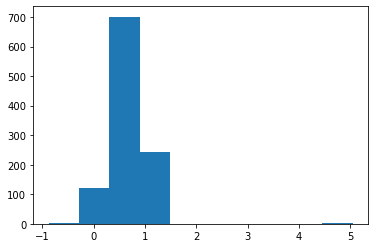

In [34]:
# x1 is the % of investments that go to transmission and distribution
investments_sales_df['pct_poles_and_wires'] = \
    (investments_sales_df['investment_value_transmission'] + \
    investments_sales_df['investment_value_distribution']) / \
    investments_sales_df['sum_investments']
x01_poles_wires_investment_pct = investments_sales_df['pct_poles_and_wires'].reset_index(drop=True)
plt.hist(x01_poles_wires_investment_pct)

**TODO: clean out data points with percentages that are negative AND those greater than 100%**

(array([10.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([1.00031702, 1.40520272, 1.81008842, 2.21497413, 2.61985983,
        3.02474553, 3.42963123, 3.83451693, 4.23940263, 4.64428833,
        5.04917403]),
 <BarContainer object of 10 artists>)

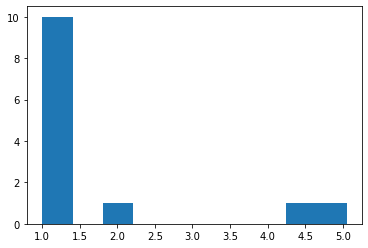

In [35]:
plt.hist(x01_poles_wires_investment_pct[x01_poles_wires_investment_pct > 1])

(array([1., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([-0.88045896, -0.85189566, -0.82333236, -0.79476906, -0.76620576,
        -0.73764246, -0.70907916, -0.68051586, -0.65195256, -0.62338926,
        -0.59482596]),
 <BarContainer object of 10 artists>)

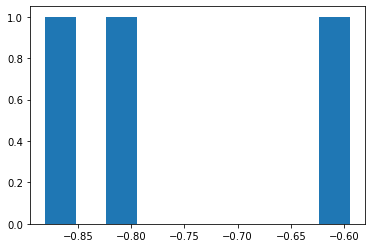

In [36]:
plt.hist(x01_poles_wires_investment_pct[x01_poles_wires_investment_pct < 0])

__x02__: % of expenditures spent on clean energy

/tmp/ipykernel_26462/3982449984.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  investments_sales_df['pct_renewable_investment'] = np.where(


(array([  1.,   1., 792., 241.,  30.,   4.,   1.,   0.,   0.,   1.]),
 array([-1.76314138, -1.10758789, -0.4520344 ,  0.20351909,  0.85907257,
         1.51462606,  2.17017955,  2.82573304,  3.48128653,  4.13684002,
         4.79239351]),
 <BarContainer object of 10 artists>)

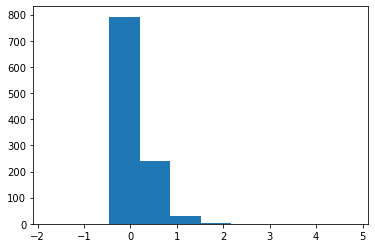

In [37]:
# x2 measures the % of expenditures for "clean" energy (renewables, nuclear, and hydro)
investments_fossil = investments_sales_df['investment_value_steam'] + investments_sales_df['investment_value_other_fossil']
investments_clean = investments_sales_df['investment_value_renewables'] + investments_sales_df['investment_value_nuclear'] + investments_sales_df['investment_value_hydro']
investments_sales_df['pct_renewable_investment'] = np.where(
    investments_sales_df['sum_investments_generation'] != 0,
    investments_clean / investments_sales_df['sum_investments_generation'], 
    0)
x02_renewables_investment_pct = investments_sales_df['pct_renewable_investment'].reset_index(drop=True)
plt.hist(x02_renewables_investment_pct)

__x03__: total investments over sales

/tmp/ipykernel_26462/127664744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  investments_sales_df['total_divided_by_sales'] = investments_sales_df['sum_investments']/investments_sales_df['sales']


(array([  1., 100., 596., 239.,  74.,  31.,  11.,  11.,   4.,   4.]),
 array([-67.9985635 , -23.56988429,  20.85879492,  65.28747413,
        109.71615333, 154.14483254, 198.57351175, 243.00219096,
        287.43087016, 331.85954937, 376.28822858]),
 <BarContainer object of 10 artists>)

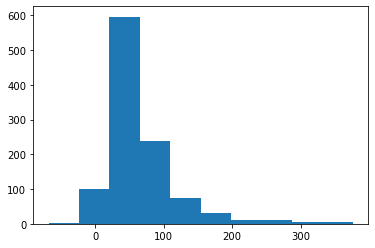

In [38]:
# x3 measures the total investments, divided by sales
investments_sales_df['total_divided_by_sales'] = investments_sales_df['sum_investments']/investments_sales_df['sales']
x03_total_investment_divided_by_sales = investments_sales_df['total_divided_by_sales'].reset_index(drop=True)
x03_total_investment_divided_by_sales[x03_total_investment_divided_by_sales>400] = x03_total_investment_divided_by_sales.median()
plt.hist(x03_total_investment_divided_by_sales)

__x04__: residential / total customers

Note, this is currently done with data from 'housing' and 'customers' columns, but could be done better with the data from customers_sales.csv


In [39]:
customer_names = ['respondent_id', 'year', 'housing_units', 'customers']
sum_customers_df = data_pre_2018_df[customer_names]
                                      
sum_customers_df.head(72)

,respondent_id,year,housing_units,customers
5,2.0,2010,1232188.0,1232188.0
6,2.0,2011,1232026.0,1232026.0
7,2.0,2012,1237730.0,1237730.0
8,2.0,2013,1241998.0,1241998.0
9,2.0,2014,1247061.0,1247061.0
...,...,...,...,...
121,11.0,2014,131724.0,132036.0
122,11.0,2015,131930.0,131784.0
123,11.0,2016,132704.0,132980.0
124,11.0,2017,132585.0,132849.0


In [40]:
sum_customers_df[sum_customers_df['customers'] == 0]

,respondent_id,year,housing_units,customers
125,11.0,2018,133192.0,0.0
1432,152.0,2013,63532.0,0.0


In [41]:
sum_customers_df[sum_customers_df['customers'] == 0]

,respondent_id,year,housing_units,customers
125,11.0,2018,133192.0,0.0
1432,152.0,2013,63532.0,0.0


/home/julian/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


(array([   2.,    0.,    0.,    0.,   18., 1022.,   20.,    0.,    3.,
           6.]),
 array([0.        , 0.19025529, 0.38051058, 0.57076586, 0.76102115,
        0.95127644, 1.14153173, 1.33178701, 1.5220423 , 1.71229759,
        1.90255288]),
 <BarContainer object of 10 artists>)

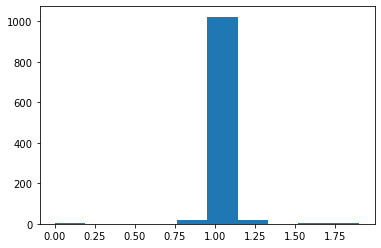

In [42]:
# handle 0 customers
def div(numerator, denominator):
  return lambda row: 0.0 if row[denominator] == 0 else float(row[numerator]/row[denominator])

sum_customers_df.loc[:, 'residential_ratio'] = sum_customers_df.apply(div('housing_units', 'customers'), axis=1)

x04_residential_customer_ratio = sum_customers_df['residential_ratio'].reset_index(drop=True)
plt.hist(x04_residential_customer_ratio)
# x04_residential_customer_ratio

__x05__: renewable / total generation (mwh)

In [43]:
gen_mwh_df

,row_id,respondent_id,year,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_steam,generation_purchased_power,generation_renewables_and_storage,sum_total_generation,sum_generation_wo_purchased,sum_fossil_generation,sum_clean_generation
5,22010.0,2.0,2010,0.595833,3.707895,13.169684,10.337048,44.022450,4.793492,0.0,76.626402,71.832910,54.359498,16.877579
6,22011.0,2.0,2011,0.049948,3.038090,14.431250,10.666586,39.396937,4.675221,0.0,72.258032,67.582811,50.063523,17.469340
7,22012.0,2.0,2012,0.070519,2.660740,14.762977,10.724467,33.224328,5.435726,0.0,66.878757,61.443031,43.948795,17.423717
8,22013.0,2.0,2013,0.085471,5.624866,14.098022,10.739554,35.701607,4.010261,0.0,70.259781,66.249520,46.441161,19.722888
9,22014.0,2.0,2014,0.096536,3.892956,14.505389,10.738816,35.361499,6.554533,0.0,71.149729,64.595196,46.100315,18.398345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,4282014.0,428.0,2014,0.000000,0.000000,0.000000,0.000016,0.356748,0.836826,0.0,1.193590,0.356764,0.356764,0.000000
1898,4282015.0,428.0,2015,0.000000,0.000000,0.000000,0.000003,0.339950,0.822487,0.0,1.162440,0.339953,0.339953,0.000000
1899,4282016.0,428.0,2016,0.000000,0.000000,0.000000,0.000004,0.254507,0.818070,0.0,1.072581,0.254511,0.254511,0.000000
1900,4282017.0,428.0,2017,0.000000,0.000000,0.000000,0.000003,0.349109,0.788461,0.0,1.137573,0.349112,0.349112,0.000000


/home/julian/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


(array([1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.07e+03]),
 array([-72.44752519, -64.51646531, -56.58540542, -48.65434553,
        -40.72328564, -32.79222575, -24.86116587, -16.93010598,
         -8.99904609,  -1.0679862 ,   6.86307369]),
 <BarContainer object of 10 artists>)

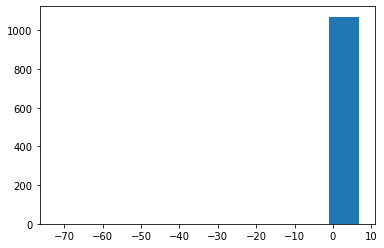

In [44]:
# handle 0 sum generation without purchased
gen_mwh_df.loc[:, 'renewable_generation_ratio'] = gen_mwh_df.apply(div('sum_clean_generation', 'sum_generation_wo_purchased'), axis=1)

x05_renewable_generation_ratio = gen_mwh_df['renewable_generation_ratio'].reset_index(drop=True)
plt.hist(x05_renewable_generation_ratio) 

In [45]:
x05_renewable_generation_ratio

0       0.234956
1       0.258488
2       0.283575
3       0.297706
4       0.284825
          ...   
1066    0.000000
1067    0.000000
1068    0.000000
1069    0.000000
1070    0.000000
Name: renewable_generation_ratio, Length: 1071, dtype: float64

In [46]:
# gen_mwh_df['renewable_generation_ratio'] = np.where(
#     gen_mwh_df['sum_generation_wo_purchased'] != 0,
#     gen_mwh_df['sum_clean_generation'] / gen_mwh_df['sum_generation_wo_purchased'],
#     0)
# x05_renewable_generation_ratio = gen_mwh_df['renewable_generation_ratio']
# plt.hist(x05_renewable_generation_ratio) 

__x06__: nuclear / clean bills ($) <font color=purple>--> deprecated</font>

In [47]:
# x6 measures the ratio of nuclear to clean bills
bills_clean = sum_bills_df['bill_renewables'] + sum_bills_df['bill_nuclear'] + sum_bills_df['bill_hydro']

x06_nuclear_renewable_bill_ratio = sum_bills_df['bill_nuclear']/bills_clean

for index, value in x06_nuclear_renewable_bill_ratio.items():
    v = x06_nuclear_renewable_bill_ratio[index]
    if np.isnan(v):
        x06_nuclear_renewable_bill_ratio[index] = 0

x06_nuclear_renewable_bill_ratio

5       0.787282
6       0.786998
7       0.804242
8       0.806518
9       0.799496
          ...   
1897    0.000000
1898    0.000000
1899    0.000000
1900    0.000000
1901    0.000000
Length: 1071, dtype: float64

__x06__: nuclear / clean generation (mwh)

/tmp/ipykernel_26462/1955738096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_mwh_df['nuclear_renewable_ratio'] = np.where(


(array([869.,   1.,   9.,   4.,   3.,   4.,   8.,  21.,  43., 109.]),
 array([0.        , 0.10570392, 0.21140783, 0.31711175, 0.42281567,
        0.52851959, 0.6342235 , 0.73992742, 0.84563134, 0.95133525,
        1.05703917]),
 <BarContainer object of 10 artists>)

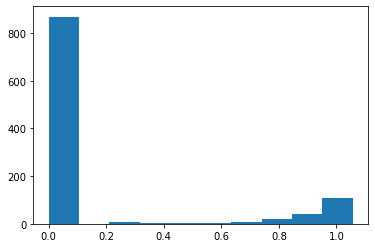

In [48]:
gen_mwh_df['nuclear_renewable_ratio'] = np.where(
    gen_mwh_df['sum_clean_generation'] != 0,
    gen_mwh_df['generation_nuclear'] / gen_mwh_df['sum_clean_generation'],
    0)
x06_nuclear_renewable_mwh_ratio = gen_mwh_df['nuclear_renewable_ratio'].reset_index(drop=True)
plt.hist(x06_nuclear_renewable_mwh_ratio)

__x07__: hydro / clean bills ($) <font color=purple>--> deprecated</font>

In [49]:
# x07 measures the ratio of hydro to clean bills

x07_hydro_renewable_ratio = sum_bills_df['bill_hydro']/bills_clean

for index, value in x07_hydro_renewable_ratio.items():
    v = x07_hydro_renewable_ratio[index]
    if np.isnan(v):
        x07_hydro_renewable_ratio[index] = 0

x07_hydro_renewable_ratio

5       0.212718
6       0.213002
7       0.195758
8       0.193482
9       0.200504
          ...   
1897    0.000000
1898    0.000000
1899    0.000000
1900    0.000000
1901    0.000000
Length: 1071, dtype: float64

__x07__: hydro / clean generation (mwh)

/tmp/ipykernel_26462/1478030273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_mwh_df['hydro_renewable_ratio'] = np.where(


(array([  1.,   0., 849., 218.,   0.,   0.,   1.,   0.,   0.,   2.]),
 array([-2.91676364, -1.79385695, -0.67095027,  0.45195642,  1.57486311,
         2.69776979,  3.82067648,  4.94358316,  6.06648985,  7.18939654,
         8.31230322]),
 <BarContainer object of 10 artists>)

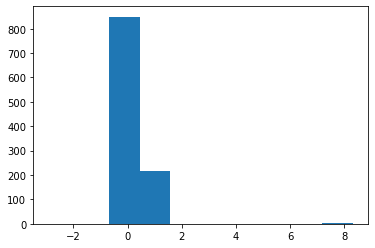

In [50]:
gen_mwh_df['hydro_renewable_ratio'] = np.where(
    gen_mwh_df['sum_clean_generation'] != 0,
    gen_mwh_df['generation_hydro'] / gen_mwh_df['sum_clean_generation'],
    0)
x07_hydro_renewable_mwh_ratio = gen_mwh_df['hydro_renewable_ratio'].reset_index(drop=True)
plt.hist(x07_hydro_renewable_mwh_ratio)

In [51]:
# looks like there are some negative values under the `generation_renewables_and_storage` column (used in the sum for the `sum_clean_generation` column)
# resulting in some of the values for this hydro/clean generation feature to be outside bounds of 0-1 (ie. 0-100%)
gen_mwh_df[gen_mwh_df['generation_hydro'] > gen_mwh_df['sum_clean_generation']]

,row_id,respondent_id,year,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_steam,generation_purchased_power,generation_renewables_and_storage,sum_total_generation,sum_generation_wo_purchased,sum_fossil_generation,sum_clean_generation,renewable_generation_ratio,nuclear_renewable_ratio,hydro_renewable_ratio
45,62018.0,6.0,2018,0.354175,0.756353,0.0,4.385579,19.258285,12.407175,-0.000210,37.161357,24.754182,23.643864,0.756143,0.030546,0.0,1.000278
203,272016.0,27.0,2016,0.790893,0.000000,0.0,0.000119,5.498224,6.172428,-0.053992,12.407672,6.235244,5.498343,-0.053992,-0.008659,-0.0,-0.000000
204,272017.0,27.0,2017,0.947813,0.000000,0.0,0.000000,0.000000,5.475918,-0.001191,6.422540,0.946622,0.000000,-0.001191,-0.001258,-0.0,-0.000000
205,272018.0,27.0,2018,1.071826,0.000000,0.0,0.000000,0.000000,5.449337,-0.001285,6.519878,1.070541,0.000000,-0.001285,-0.001200,-0.0,-0.000000
1085,1272018.0,127.0,2018,0.000000,0.000000,0.0,0.000000,0.000000,15.894138,-0.001278,15.892860,-0.001278,0.000000,-0.001278,1.000000,-0.0,-0.000000


__x08__: regulatory environment (rps targets)

from 2018 (instead of 2020 used previously)

In [52]:
rps_mean = data_pre_2018_df.groupby(['respondent_id']).agg({'rps_score': ['mean']}).reset_index()
rps_mean = rps_mean.droplevel(1, axis=1)  #drop the 2nd column header labeled 'mean'
rps_mean

,respondent_id,rps_score
0,2.0,0.000000
1,3.0,0.000000
2,6.0,10.499625
3,7.0,14.612634
4,8.0,0.000000
...,...,...
111,281.0,0.764927
112,288.0,11.250000
113,290.0,0.000000
114,403.0,0.000000


In [53]:
data_pre_2018_df_with_rps = pd.merge(data_pre_2018_df, \
                                     rps_mean, \
                                     how="left", \
                                     on=["respondent_id"])
data_pre_2018_df_with_rps

,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,...,generation_hydro,generation_nuclear,generation_other_fossil,generation_purchased_power,generation_renewables_and_storage,generation_steam,energy_burden,normalized_expenditure,row_id,rps_score_y
0,2.0,2010,375.715469,13.529815,57.306195,207.855781,29.301764,108.447788,146.998675,147.119361,...,3.707895,13.169684,10.337048,4.793492,0.0,44.022450,0.033783,111.838989,22010.0,0.0
1,2.0,2011,310.984887,10.408721,65.922993,198.367910,28.815423,106.466901,123.115743,132.823094,...,3.038090,14.431250,10.666586,4.675221,0.0,39.396937,0.031261,114.943218,22011.0,0.0
2,2.0,2012,251.854838,7.318077,63.958472,193.694724,28.306831,116.294001,135.947289,111.941675,...,2.660740,14.762977,10.724467,5.435726,0.0,33.224328,0.029887,117.445000,22012.0,0.0
3,2.0,2013,305.709743,8.302617,47.394754,196.508342,27.988239,116.667248,137.888028,119.111570,...,5.624866,14.098022,10.739554,4.010261,0.0,35.701607,0.028994,115.989436,22013.0,0.0
4,2.0,2014,321.439930,9.774353,23.646072,206.273280,30.414294,121.274889,148.945759,127.578481,...,3.892956,14.505389,10.738816,6.554533,0.0,35.361499,0.030413,117.954902,22014.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,428.0,2014,158.113482,555.291597,-126.117586,203.376168,0.000000,0.000000,197.721946,0.000000,...,0.000000,0.000000,0.000016,0.836826,0.0,0.356748,0.022694,128.591665,4282014.0,0.0
1067,428.0,2015,143.199850,384.308423,-112.101241,201.287076,0.000000,0.000000,194.074933,0.000000,...,0.000000,0.000000,0.000003,0.822487,0.0,0.339950,0.019192,117.336134,4282015.0,0.0
1068,428.0,2016,120.751263,294.214436,-116.874290,203.470335,0.000000,0.000000,179.737203,0.000000,...,0.000000,0.000000,0.000004,0.818070,0.0,0.254507,0.018758,111.441490,4282016.0,0.0
1069,428.0,2017,144.546326,323.702090,-168.226409,206.674057,0.000000,0.000000,207.970206,0.000000,...,0.000000,0.000000,0.000003,0.788461,0.0,0.349109,0.015613,106.074202,4282017.0,0.0


(array([522., 234., 126.,  36.,  18.,   9.,  63.,   0.,  45.,  18.]),
 array([ 0. ,  5.6, 11.2, 16.8, 22.4, 28. , 33.6, 39.2, 44.8, 50.4, 56. ]),
 <BarContainer object of 10 artists>)

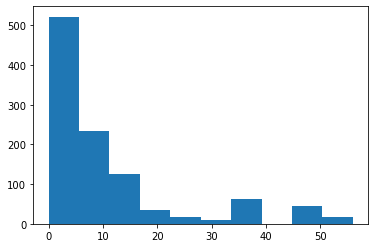

In [54]:
x08_regulatory_rps_target = data_pre_2018_df_with_rps['rps_score_y']
plt.hist(x08_regulatory_rps_target)

__c09__: utility type (veritcally integrated, poles and wires only, etc.)

In [55]:
data_pre_2018_df_with_utility_type = pd.merge(data_pre_2018_df, \
                                              utility_info_df, \
                                              how="left", \
                                              on=["respondent_id"])
data_pre_2018_df_with_utility_type

,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,...,generation_hydro,generation_nuclear,generation_other_fossil,generation_purchased_power,generation_renewables_and_storage,generation_steam,energy_burden,normalized_expenditure,row_id,utype_y
0,2.0,2010,375.715469,13.529815,57.306195,207.855781,29.301764,108.447788,146.998675,147.119361,...,3.707895,13.169684,10.337048,4.793492,0.0,44.022450,0.033783,111.838989,22010.0,vert_int
1,2.0,2011,310.984887,10.408721,65.922993,198.367910,28.815423,106.466901,123.115743,132.823094,...,3.038090,14.431250,10.666586,4.675221,0.0,39.396937,0.031261,114.943218,22011.0,vert_int
2,2.0,2012,251.854838,7.318077,63.958472,193.694724,28.306831,116.294001,135.947289,111.941675,...,2.660740,14.762977,10.724467,5.435726,0.0,33.224328,0.029887,117.445000,22012.0,vert_int
3,2.0,2013,305.709743,8.302617,47.394754,196.508342,27.988239,116.667248,137.888028,119.111570,...,5.624866,14.098022,10.739554,4.010261,0.0,35.701607,0.028994,115.989436,22013.0,vert_int
4,2.0,2014,321.439930,9.774353,23.646072,206.273280,30.414294,121.274889,148.945759,127.578481,...,3.892956,14.505389,10.738816,6.554533,0.0,35.361499,0.030413,117.954902,22014.0,vert_int
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,428.0,2014,158.113482,555.291597,-126.117586,203.376168,0.000000,0.000000,197.721946,0.000000,...,0.000000,0.000000,0.000016,0.836826,0.0,0.356748,0.022694,128.591665,4282014.0,other_wires
1067,428.0,2015,143.199850,384.308423,-112.101241,201.287076,0.000000,0.000000,194.074933,0.000000,...,0.000000,0.000000,0.000003,0.822487,0.0,0.339950,0.019192,117.336134,4282015.0,other_wires
1068,428.0,2016,120.751263,294.214436,-116.874290,203.470335,0.000000,0.000000,179.737203,0.000000,...,0.000000,0.000000,0.000004,0.818070,0.0,0.254507,0.018758,111.441490,4282016.0,other_wires
1069,428.0,2017,144.546326,323.702090,-168.226409,206.674057,0.000000,0.000000,207.970206,0.000000,...,0.000000,0.000000,0.000003,0.788461,0.0,0.349109,0.015613,106.074202,4282017.0,other_wires


(array([657.,   0.,   0., 279.,   0.,   0., 126.,   0.,   0.,   9.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

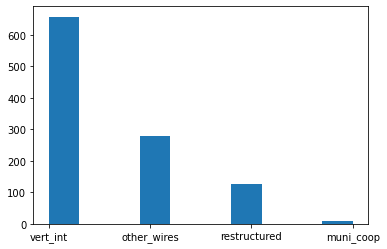

In [56]:
c09_utility_type = data_pre_2018_df_with_utility_type['utype_y']
plt.hist(c09_utility_type)

**Consolidate feature variables into model_data table**

In [57]:
model_data = pd.DataFrame(
    {
        'target': target, 
        'x01': x01_poles_wires_investment_pct,
        'x02': x02_renewables_investment_pct,
        'x03': x03_total_investment_divided_by_sales,
        'x04': x04_residential_customer_ratio,
        'x05': x05_renewable_generation_ratio,
        'x06': x06_nuclear_renewable_mwh_ratio,
        'x07': x07_hydro_renewable_mwh_ratio,
        'x08': x08_regulatory_rps_target,
        'c09': c09_utility_type,
    }
)
model_data

,target,x01,x02,x03,x04,x05,x06,x07,x08,c09
0,0.024761,0.277673,0.074652,76.268450,1.000000,0.234956,0.780306,0.219694,0.0,vert_int
1,0.004686,0.535174,0.340114,56.872832,1.000000,0.258488,0.826090,0.173910,0.0,vert_int
2,0.002276,0.590562,0.256538,39.581972,1.000000,0.283575,0.847292,0.152708,0.0,vert_int
3,0.025767,0.532942,0.190320,48.594641,1.000000,0.297706,0.714805,0.285195,0.0,vert_int
4,0.035918,0.544757,0.132016,63.100622,1.000000,0.284825,0.788407,0.211593,0.0,vert_int
...,...,...,...,...,...,...,...,...,...,...
1066,-0.068883,0.932067,0.000000,13.963864,1.000184,0.000000,0.000000,0.000000,0.0,other_wires
1067,-0.049200,0.968892,0.000000,13.343040,0.999705,0.000000,0.000000,0.000000,0.0,other_wires
1068,0.012818,0.967203,0.000000,15.391979,1.019307,0.000000,0.000000,0.000000,0.0,other_wires
1069,0.018991,0.982521,0.000000,25.569884,1.017807,0.000000,0.000000,0.000000,0.0,other_wires


In [58]:
model_data[model_data['target'] > 10]

,target,x01,x02,x03,x04,x05,x06,x07,x08,c09
700,438.376321,0.720068,0.0,0.01680,1.000000,0.0,0.0,0.0,0.0,other_wires
701,439.404643,0.963772,0.0,0.02196,0.939323,0.0,0.0,0.0,0.0,other_wires


In [59]:
# Filter out the target outliers
# model_data = model_data[model_data['target'] < 10]
# model_data

#### Check for covariance

In [60]:
# import seaborn as sns
# sns.pairplot(model_data.drop(columns=['target']))

In [61]:
corr = model_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,target,x01,x02,x03,x04,x05,x06,x07,x08
target,1.000000,0.022777,-0.021689,-0.055640,-0.018443,-0.002345,-0.020069,-0.018601,-0.031140
x01,0.022777,1.000000,-0.184827,-0.395681,0.091885,-0.030789,-0.230650,-0.093459,0.070134
x02,-0.021689,-0.184827,1.000000,0.198518,-0.017868,0.070881,0.349938,0.131211,0.232019
x03,-0.055640,-0.395681,0.198518,1.000000,-0.033510,0.030597,0.180140,0.033872,0.159603
x04,-0.018443,0.091885,-0.017868,-0.033510,1.000000,0.016442,-0.037334,-0.000791,0.018929
x05,-0.002345,-0.030789,0.070881,0.030597,0.016442,1.000000,0.057077,0.002284,0.008322
x06,-0.020069,-0.230650,0.349938,0.180140,-0.037334,0.057077,1.000000,-0.160512,0.172507
x07,-0.018601,-0.093459,0.131211,0.033872,-0.000791,0.002284,-0.160512,1.000000,0.195820
x08,-0.031140,0.070134,0.232019,0.159603,0.018929,0.008322,0.172507,0.195820,1.000000


#### Save model_data file

In [62]:
output_dir = os.path.join('..', 'data', 'processed', 'model_v2')

In [63]:
model_data.to_csv(os.path.join(output_dir, 'model_2_data.csv'), index=False)